In [2]:
using Revise
using JuMIT

INFO: Recompiling stale cache file /math/home/pawbz/.julia/lib/v0.6/Revise.ji for module Revise.
INFO: Precompiling module JuMIT.
Expr(:call, Expr(:., :Base, :include_from_node1)::Any, "/math/home/pawbz/.julia/v0.6/FFTW/src/FFTW.jl")::Any
  ** incremental compilation may be broken for this module **

Expr(:call, Expr(:., :Base, :include_from_node1)::Any, "/math/home/pawbz/.julia/v0.6/FFTW/src/FFTW.jl")::Any
  ** incremental compilation may be broken for this module **

Expr(:call, Expr(:., :Base, :include_from_node1)::Any, "/math/home/pawbz/.julia/v0.6/FFTW/src/FFTW.jl")::Any
  ** incremental compilation may be broken for this module **



In [28]:
using Plots

INFO: Recompiling stale cache file /math/home/pawbz/.julia/lib/v0.6/Plots.ji for module Plots.


In [3]:
model = JuMIT.Gallery.Seismic(:acou_homo1);
acqgeom = JuMIT.Gallery.Geom(model.mgrid,:xwell);
tgrid = JuMIT.Gallery.M1D(:acou_homo1);
wav = Signals.Wavelets.ricker(10.0, tgrid, tpeak=0.25, );
# source wavelet for modelling
acqsrc = JuMIT.Acquisition.Src_fixed(acqgeom.nss,1,[:P],wav,tgrid);


	Acquisition Geometry:	xwell
	> number of supersources:	2
	> sources per supersource:	min	1	max	1
	> receivers per supersource:	min	2	max	2
	> number of unique positions of:	sources	2	receivers	2


In [4]:
vp0=mean(JuMIT.Models.χ(model.χvp,model.vp0,-1))
ρ0=mean(JuMIT.Models.χ(model.χρ,model.ρ0,-1))
rec1 = JuMIT.Analytic.mod(vp0=vp0,           model_pert=model,                            ρ0=ρ0,                               acqgeom=acqgeom, acqsrc=acqsrc, tgridmod=tgrid, src_flag=2)


JuMIT.Data.TD(Array{Float64,2}[[-0.00050644 -0.000546262; -0.000505681 -0.000545394; … ; -0.00668349 -0.0107351; -0.00665426 -0.0106737]; [-0.000546262 -0.00050644; -0.000545394 -0.000505681; … ; -0.0107351 -0.00668349; -0.0106737 -0.00665426]], Symbol[:P], Grid.M1D([0.0, 0.002002, 0.004004, 0.00600601, 0.00800801, 0.01001, 0.012012, 0.014014, 0.016016, 0.018018  …  1.98198, 1.98398, 1.98599, 1.98799, 1.98999, 1.99199, 1.99399, 1.996, 1.998, 2.0], 1000, 0.002002002002002002), JuMIT.Acquisition.Geom(Array{Float64,1}[[-800.0], [-800.0]], Array{Float64,1}[[-800.0], [800.0]], Array{Float64,1}[[800.0, 800.0], [800.0, 800.0]], Array{Float64,1}[[-800.0, 800.0], [-800.0, 800.0]], 2, [1, 1], [2, 2]))

In [56]:
pa=JuMIT.Fdtd.Param(npw=1,model=model, acqgeom=[acqgeom], acqsrc=[acqsrc],        sflags=[2], rflags=[1],            tgridmod=tgrid, verbose=true);

INFO: spatial sampling (1.00e+01) can be as high as 1.02e+01


In [82]:
pab=JuMIT.Fdtd.Param(npw=2,model=model, acqgeom=[acqgeom, acqgeom], acqsrc=[acqsrc, acqsrc],        sflags=[2, 0], rflags=[1, 1],            tgridmod=tgrid, verbose=true, born_flag=true);

INFO: spatial sampling (1.00e+01) can be as high as 1.02e+01


In [83]:
@time JuMIT.Fdtd.mod!(pab);

	modeling supershot 1/2 100%|███████████████████████████| Time: 0:00:05


 ────────────────────────────────────────────────────────────────────────
                                 Time                   Allocations      
                         ──────────────────────   ───────────────────────
    Tot / % measured:         10.8s / 100%             924KiB / 100%     

 Section         ncalls     time   %tot     avg     alloc   %tot      avg
 ────────────────────────────────────────────────────────────────────────
 mod_per_proc!        1    10.8s   100%   10.8s    897KiB  97.6%   897KiB
 initialize!          1   4.33ms  0.04%  4.33ms   8.61KiB  0.94%  8.61KiB
 update gmodel        1   1.79ms  0.02%  1.79ms   6.11KiB  0.66%  6.11KiB
 record data          1    203μs  0.00%   203μs   5.16KiB  0.56%  5.16KiB
 stack_grads!         1    105μs  0.00%   105μs   2.55KiB  0.28%  2.55KiB
 ──────────────────────────────────────────────────────────────────────── 10.792100 seconds (16.26 k allocations: 993.688 KiB)


	modeling supershot 2/2 100%|███████████████████████████| Time: 0:00:05


In [32]:
# least-squares misfit
paerr=JuMIT.Data.P_misfit(rec1, pa.c.data[1])
err = JuMIT.Data.func_grad!(paerr)
 
# normalization
error = err[1]

# desired accuracy?
@test error<1e-2
println(error)


0.00308132462167861


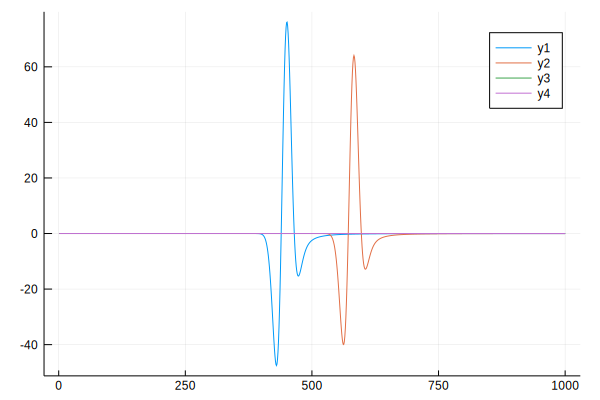

In [81]:
plot(rec1.d[1,1])
plot!(pab.c.data[2].d[1,1])